/var/folders/mn/tx231v5158797chnp22wm9000000gp/T/ipykernel_68589/1769803327.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2024-01-01", end="2025-08-04", multi_level_index=False)
[*********************100%***********************]  1 of 1 completed


📊 Signals for RELIANCE.NS
                  Close       SMA50       SMA200
Date                                            
2025-05-29  1412.160034  1325.21522  1322.536296
Empty DataFrame
Columns: [Close, SMA50, SMA200]
Index: []



/var/folders/mn/tx231v5158797chnp22wm9000000gp/T/ipykernel_68589/1769803327.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][50:] = (data['SMA50'][50:] > data['SMA200'][50:]).astype(int)
/var/folders/mn/tx231v5158797chnp2

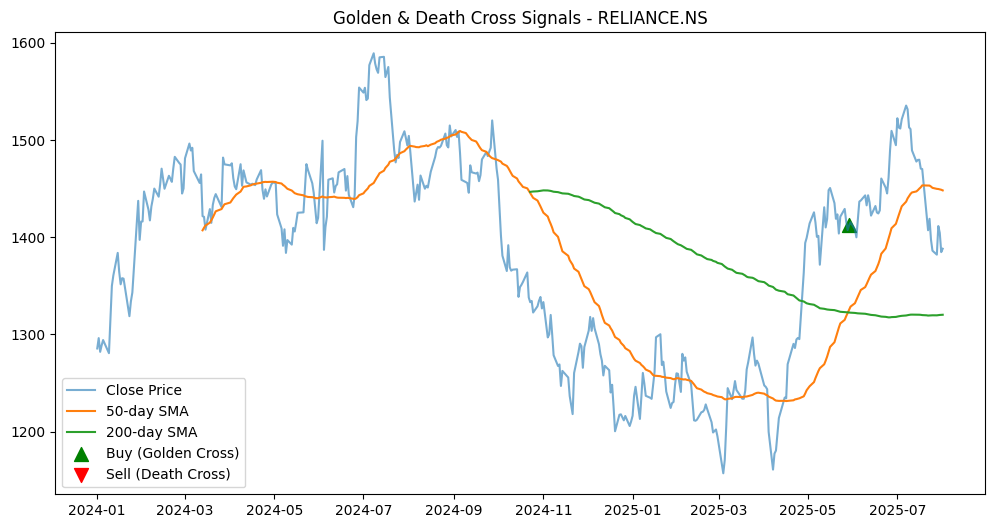

/var/folders/mn/tx231v5158797chnp22wm9000000gp/T/ipykernel_68589/1769803327.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2024-01-01", end="2025-08-04", multi_level_index=False)
[*********************100%***********************]  1 of 1 completed


📊 Signals for TCS.NS
                  Close        SMA50       SMA200
Date                                             
2024-10-23  4007.244873  4271.985879  3976.420833
                  Close        SMA50       SMA200
Date                                             
2025-02-19  3738.076172  4069.131606  4080.361018



/var/folders/mn/tx231v5158797chnp22wm9000000gp/T/ipykernel_68589/1769803327.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][50:] = (data['SMA50'][50:] > data['SMA200'][50:]).astype(int)
/var/folders/mn/tx231v5158797chnp2

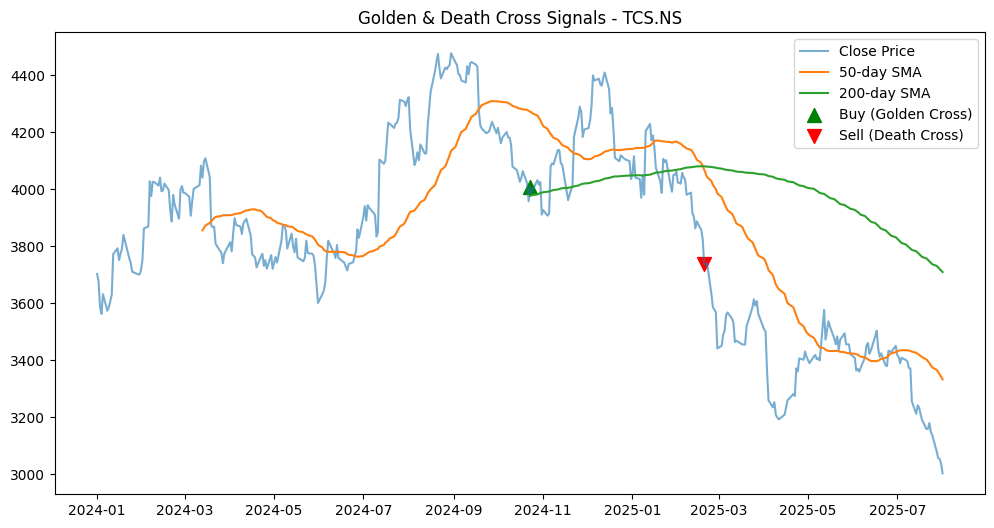

/var/folders/mn/tx231v5158797chnp22wm9000000gp/T/ipykernel_68589/1769803327.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2024-01-01", end="2025-08-04", multi_level_index=False)
[*********************100%***********************]  1 of 1 completed


📊 Signals for INFY.NS
                  Close        SMA50       SMA200
Date                                             
2024-10-23  1826.608765  1859.099482  1612.789003
                  Close        SMA50       SMA200
Date                                             
2025-03-20  1593.134521  1778.336611  1781.428552



/var/folders/mn/tx231v5158797chnp22wm9000000gp/T/ipykernel_68589/1769803327.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][50:] = (data['SMA50'][50:] > data['SMA200'][50:]).astype(int)
/var/folders/mn/tx231v5158797chnp2

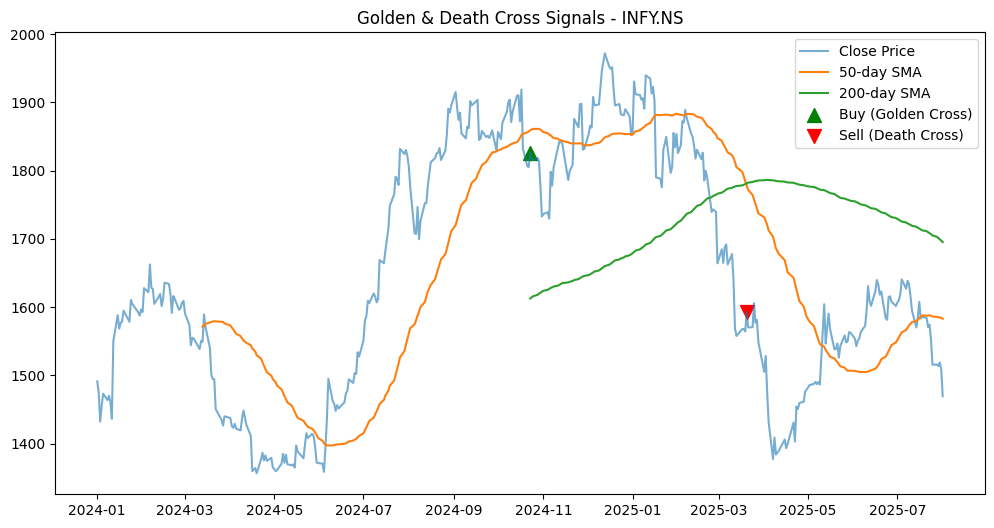

In [4]:
"""
A Golden Crossover (also called Golden Cross) is a bullish technical indicator in trading.

It happens when:

👉 The short-term moving average (like the 50-day moving average) crosses above the long-term moving average (like the 200-day moving average).

Why it matters:
	•	It signals that short-term momentum is getting stronger than long-term momentum.
	•	Traders interpret it as a possible start of a new uptrend.
	•	It often attracts buyers, especially in stocks, indices, and crypto markets.

Typical setup:
	•	50-day MA crossing above the 200-day MA → Golden Cross (bullish).
	•	50-day MA crossing below the 200-day MA → Death Cross (bearish).

📈 Example:
If a stock’s 50-day average price moves above its 200-day average, traders see it as confirmation that the stock might keep rising.

"""

import yfinance as yf
import talib
import matplotlib.pyplot as plt

# List of stocks (NSE example, add more)
stocks = ["RELIANCE.NS", "TCS.NS", "INFY.NS"]

def analyze_stock(ticker):
    data = yf.download(ticker, start="2024-01-01", end="2025-08-04", multi_level_index=False)

    # 50 & 200 SMA
    data['SMA50'] = talib.SMA(data['Close'], timeperiod=50)
    data['SMA200'] = talib.SMA(data['Close'], timeperiod=200)

    # Generate Signals
    data['Signal'] = 0
    data['Signal'][50:] = (data['SMA50'][50:] > data['SMA200'][50:]).astype(int)
    data['Crossover'] = data['Signal'].diff()

    # Buy = Golden Cross, Sell = Death Cross
    data['Buy'] = data['Crossover'] == 1
    data['Sell'] = data['Crossover'] == -1

    # Print signals
    print(f"\n📊 Signals for {ticker}")
    print(data[data['Buy']][['Close', 'SMA50', 'SMA200']].tail())   # Last few buys
    print(data[data['Sell']][['Close', 'SMA50', 'SMA200']].tail()) # Last few sells

    # Plot chart
    plt.figure(figsize=(12,6))
    plt.plot(data['Close'], label='Close Price', alpha=0.6)
    plt.plot(data['SMA50'], label='50-day SMA')
    plt.plot(data['SMA200'], label='200-day SMA')

    # Mark Buy/Sell
    plt.scatter(data.index[data['Buy']], data['Close'][data['Buy']], marker='^', color='g', label='Buy (Golden Cross)', s=100)
    plt.scatter(data.index[data['Sell']], data['Close'][data['Sell']], marker='v', color='r', label='Sell (Death Cross)', s=100)

    plt.title(f"Golden & Death Cross Signals - {ticker}")
    plt.legend()
    plt.show()

# Run for all stocks
for stock in stocks:
    analyze_stock(stock)

/var/folders/mn/tx231v5158797chnp22wm9000000gp/T/ipykernel_68589/398154414.py:82: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2025-01-01", multi_level_index=False)
[*********************100%***********************]  1 of 1 completed


📊 Optimization results for RELIANCE.NS
   Short  Long  TotalReturn      CAGR    Sharpe  MaxDrawdown   BuyHold
0     10    50     0.586521  0.096648  0.605488    -0.281159  0.792642
1     20   100     0.177122  0.033134  0.269735    -0.363687  0.792642
2     50   200     0.132324  0.025152  0.226613    -0.246023  0.792642

✅ Best SMA Pair for RELIANCE.NS: 10/50 with CAGR 9.66%



/var/folders/mn/tx231v5158797chnp22wm9000000gp/T/ipykernel_68589/398154414.py:23: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Signal'][long_win:] = (df['SMA_Short'][long_win:] > df['SMA_Long'][long_win:]).astype(int)
/var/folders/mn/t

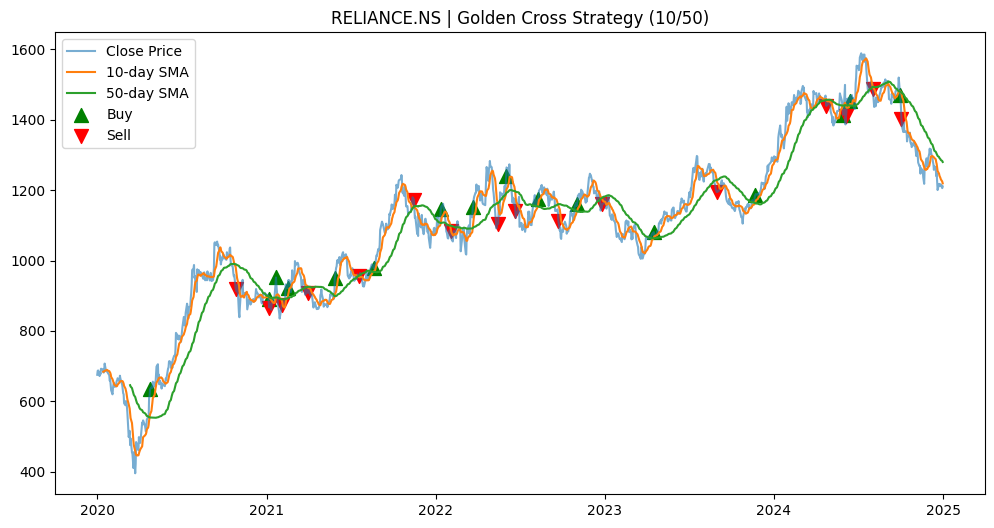

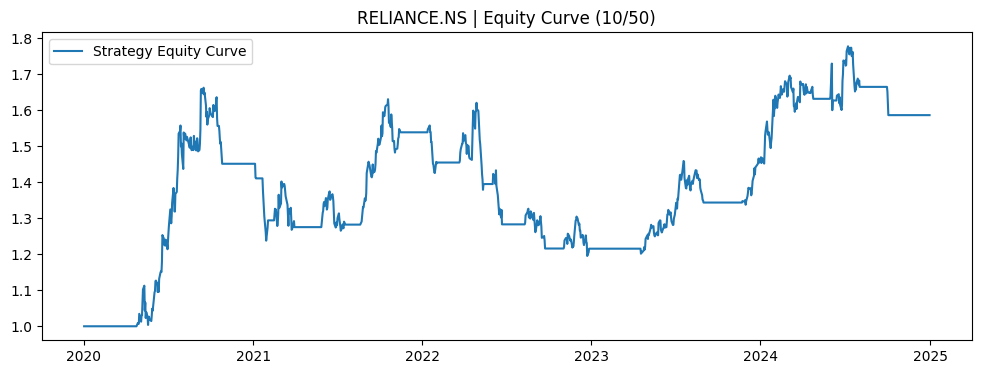

/var/folders/mn/tx231v5158797chnp22wm9000000gp/T/ipykernel_68589/398154414.py:82: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2025-01-01", multi_level_index=False)
[*********************100%***********************]  1 of 1 completed
/var/folders/mn/tx231v5158797chnp22wm9000000gp/T/ipykernel_68589/398154414.py:23: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in


📊 Optimization results for TCS.NS
   Short  Long  TotalReturn      CAGR    Sharpe  MaxDrawdown   BuyHold
0     10    50     0.669949  0.107940  0.688726    -0.215439  1.031785
1     20   100     0.507924  0.085566  0.570776    -0.207673  1.031785
2     50   200     0.558070  0.092688  0.615993    -0.200632  1.031785

✅ Best SMA Pair for TCS.NS: 10/50 with CAGR 10.79%


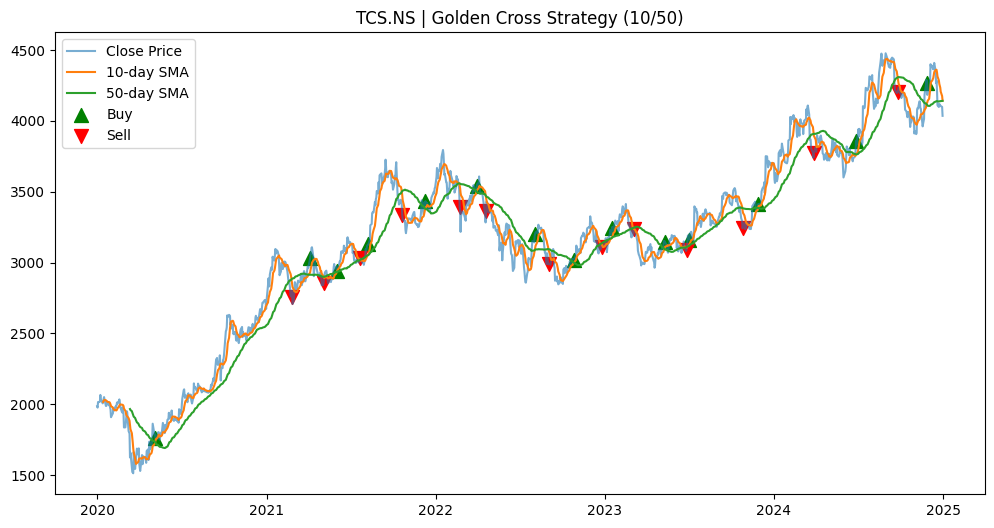

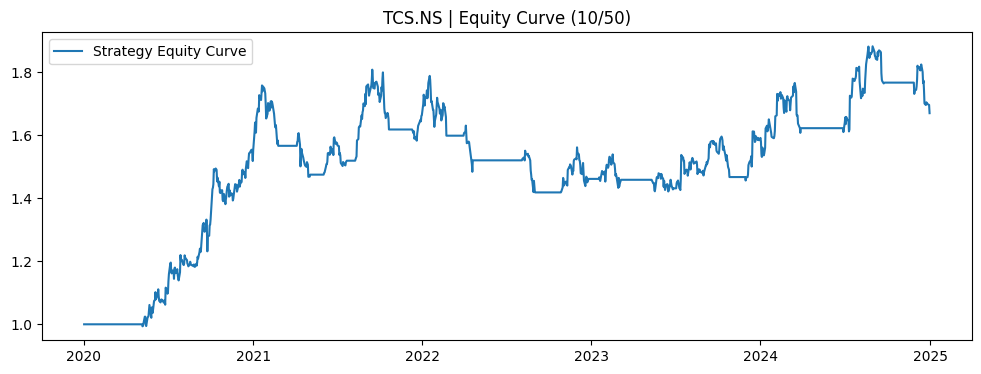

/var/folders/mn/tx231v5158797chnp22wm9000000gp/T/ipykernel_68589/398154414.py:82: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2025-01-01", multi_level_index=False)
[*********************100%***********************]  1 of 1 completed
/var/folders/mn/tx231v5158797chnp22wm9000000gp/T/ipykernel_68589/398154414.py:23: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in


📊 Optimization results for INFY.NS
   Short  Long  TotalReturn      CAGR    Sharpe  MaxDrawdown   BuyHold
0     10    50     1.428979  0.194105  1.002318    -0.338534  1.867535
1     20   100     0.865784  0.132772  0.731542    -0.481125  1.867535
2     50   200     0.370256  0.064990  0.450780    -0.348425  1.867535

✅ Best SMA Pair for INFY.NS: 10/50 with CAGR 19.41%


/var/folders/mn/tx231v5158797chnp22wm9000000gp/T/ipykernel_68589/398154414.py:23: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Signal'][long_win:] = (df['SMA_Short'][long_win:] > df['SMA_Long'][long_win:]).astype(int)
/var/folders/mn/tx

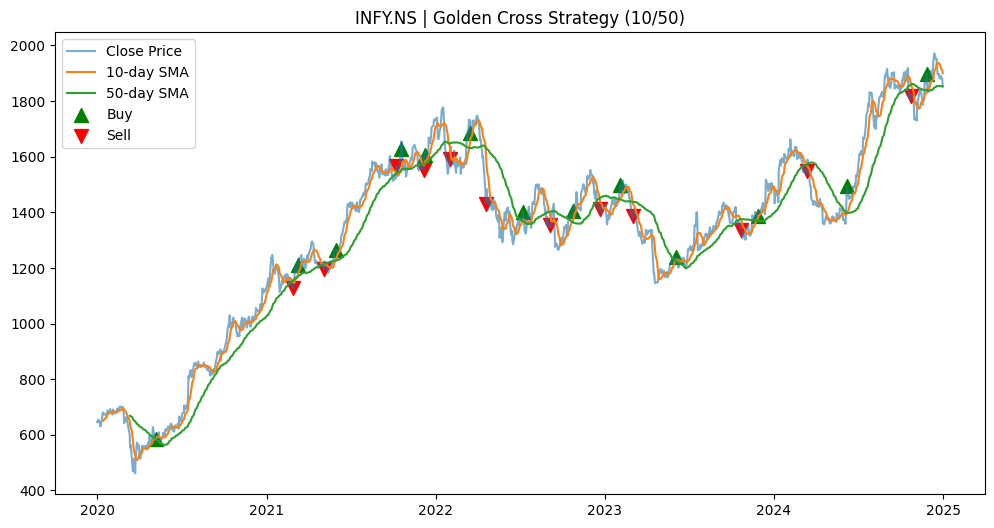

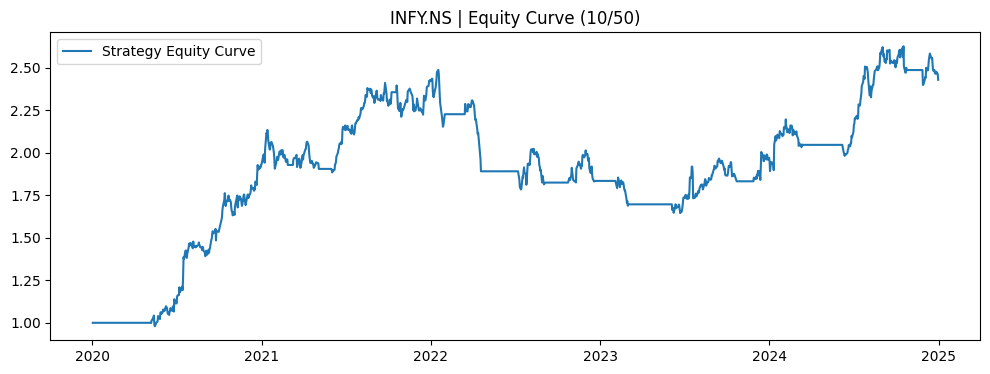


📌 Best Strategy per Stock:
         Stock  Short  Long      CAGR    Sharpe  MaxDrawdown   BuyHold
0  RELIANCE.NS   10.0  50.0  0.096648  0.605488    -0.281159  0.792642
0       TCS.NS   10.0  50.0  0.107940  0.688726    -0.215439  1.031785
0      INFY.NS   10.0  50.0  0.194105  1.002318    -0.338534  1.867535


In [7]:
import yfinance as yf
import talib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# List of stocks
stocks = ["RELIANCE.NS", "TCS.NS", "INFY.NS"]

# Candidate SMA pairs
sma_pairs = [(10, 50), (20, 100), (50, 200)]

def backtest_strategy(data, short_win, long_win, plot=False, ticker=""):
    """Backtest Golden Cross strategy for given SMA pair."""
    df = data.copy()

    # Calculate SMAs
    df['SMA_Short'] = talib.SMA(df['Close'], timeperiod=short_win)
    df['SMA_Long'] = talib.SMA(df['Close'], timeperiod=long_win)

    # Signals
    df['Signal'] = 0
    df['Signal'][long_win:] = (df['SMA_Short'][long_win:] > df['SMA_Long'][long_win:]).astype(int)
    df['Crossover'] = df['Signal'].diff()

    # Buy & Sell markers
    buys = df[df['Crossover'] == 1]
    sells = df[df['Crossover'] == -1]

    # Strategy returns
    df['Daily_Return'] = df['Close'].pct_change()
    df['Strategy_Return'] = df['Signal'].shift(1) * df['Daily_Return']
    cumulative_return = (1 + df['Strategy_Return']).cumprod()

    # Metrics
    total_return = cumulative_return.iloc[-1] - 1
    years = (df.index[-1] - df.index[0]).days / 365
    CAGR = (1 + total_return) ** (1/years) - 1 if years > 0 else 0
    volatility = df['Strategy_Return'].std() * np.sqrt(252)
    sharpe = (df['Strategy_Return'].mean() * 252) / volatility if volatility != 0 else 0

    # Max Drawdown
    rolling_max = cumulative_return.cummax()
    drawdown = (cumulative_return - rolling_max) / rolling_max
    max_drawdown = drawdown.min()

    # Buy & Hold return
    buy_hold_return = df['Close'].iloc[-1] / df['Close'].iloc[0] - 1

    # ---------------- Plot if requested ----------------
    if plot:
        # Price chart with signals
        plt.figure(figsize=(12,6))
        plt.plot(df['Close'], label='Close Price', alpha=0.6)
        plt.plot(df['SMA_Short'], label=f'{short_win}-day SMA')
        plt.plot(df['SMA_Long'], label=f'{long_win}-day SMA')
        plt.scatter(buys.index, buys['Close'], marker='^', color='g', label='Buy', s=100)
        plt.scatter(sells.index, sells['Close'], marker='v', color='r', label='Sell', s=100)
        plt.title(f"{ticker} | Golden Cross Strategy ({short_win}/{long_win})")
        plt.legend()
        plt.show()

        # Equity curve
        plt.figure(figsize=(12,4))
        plt.plot(cumulative_return, label="Strategy Equity Curve")
        plt.title(f"{ticker} | Equity Curve ({short_win}/{long_win})")
        plt.legend()
        plt.show()

    return {
        "Short": short_win,
        "Long": long_win,
        "TotalReturn": total_return,
        "CAGR": CAGR,
        "Sharpe": sharpe,
        "MaxDrawdown": max_drawdown,
        "BuyHold": buy_hold_return
    }

def analyze_stock(ticker):
    """Run optimization for one stock and plot best pair."""
    data = yf.download(ticker, start="2020-01-01", end="2025-01-01", multi_level_index=False)

    results = []
    for short, long in sma_pairs:
        if short >= long:  # invalid combo
            continue
        res = backtest_strategy(data, short, long, plot=False, ticker=ticker)
        results.append(res)

    df_results = pd.DataFrame(results)
    best = df_results.sort_values(by="CAGR", ascending=False).iloc[0]

    print(f"\n📊 Optimization results for {ticker}")
    print(df_results[["Short","Long","TotalReturn","CAGR","Sharpe","MaxDrawdown","BuyHold"]])
    print(f"\n✅ Best SMA Pair for {ticker}: {int(best['Short'])}/{int(best['Long'])} with CAGR {best['CAGR']:.2%}")

    # Re-run best pair with plots
    backtest_strategy(data, int(best['Short']), int(best['Long']), plot=True, ticker=ticker)

    return best

# Run optimizer for all stocks
summary_best = []
for stock in stocks:
    best = analyze_stock(stock)
    best["Stock"] = stock
    summary_best.append(best)

summary_best_df = pd.DataFrame(summary_best)
print("\n📌 Best Strategy per Stock:")
print(summary_best_df[["Stock","Short","Long","CAGR","Sharpe","MaxDrawdown","BuyHold"]])